In [28]:
"""
Created on: Thu. 13 Oct. 2022
Updated on: Fri. 14 Oct. 2022
Updated on: Mon. 31 Oct. 2022
Updated on: Tue. 1 Nov. 2022
Updated on: Wed. 2 Nov. 2022
Updated on: Mon. 14 Nov. 2022
Updated on: Wed. 23 Nov. 2022
Author: Mélina Verger

Visual prediction probabilities distribution comparisons.
"""

# To exit script
from sys import exit

# To load the trained models
import pickle

# For data manipulation
import pandas as pd
import numpy as np

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# To compute area between two curves
import similaritymeasures

## Load data sets and trained models

In [29]:
DATA = pickle.load(open("../data/DATA", "rb"))
SPLIT = pickle.load(open("../data/SPLIT", "rb"))
SFEATURES = pickle.load(open("../data/SFEATURES", "rb"))

print(DATA)
print(SPLIT)
print(SFEATURES)

stInfo
7030
['gender', 'imd_band', 'disability']


In [30]:
# Load test sets

X_test = pd.read_csv("../data/X_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_test = pd.read_csv("../data/y_test" + "_" + DATA + "_" + SPLIT + ".csv")

In [31]:
# Load trained models

MODELS = pickle.load(open("../data/MODELS", "rb"))  # dict with names and trained models
models = MODELS

In [32]:
if "clf_svc" in models:
    del models["clf_svc"]  # except svc 

## Separate data sets by (un-)protected groups

/!\ The following only works for binary sensitive features.

In [33]:
dict_subsets_test = dict()

for sensfeat in SFEATURES:
    # X_test_{sensitive feature and group 1/0}
    dict_subsets_test["X"+ "_test_" + sensfeat + "_"+ "1"] = X_test[X_test[sensfeat] == 1]
    dict_subsets_test["X"+ "_test_" + sensfeat + "_"+ "0"] = X_test[X_test[sensfeat] == 0]
    # y_test_{sensitive feature and group 1/0}
    dict_subsets_test["y"+ "_test_" + sensfeat + "_"+ "1"] = y_test.loc[dict_subsets_test["X" + "_test_" + sensfeat + "_" + "1"].index]
    dict_subsets_test["y"+ "_test_" + sensfeat + "_"+ "0"] = y_test.loc[dict_subsets_test["X" + "_test_" + sensfeat + "_" + "0"].index]

## Plotting prediction probability distributions
(probability estimates)

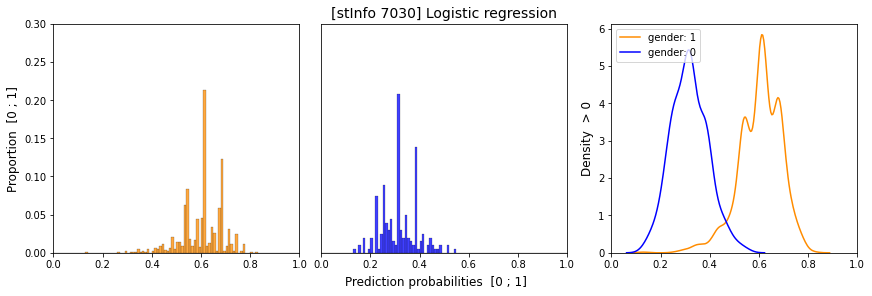

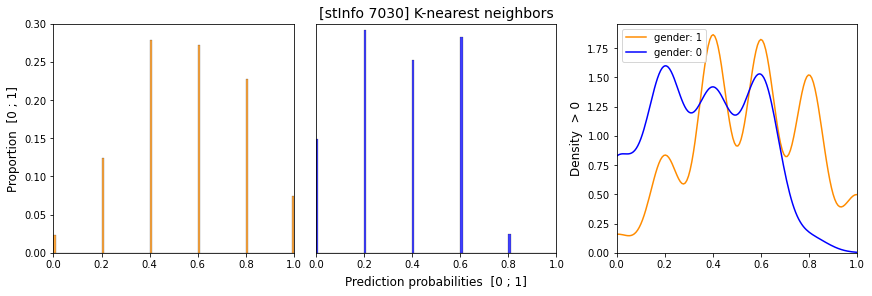

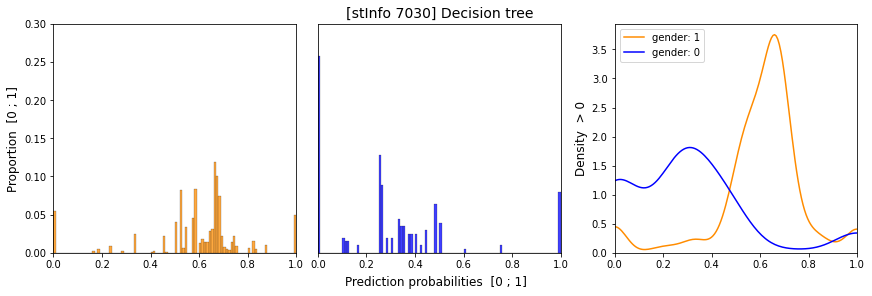

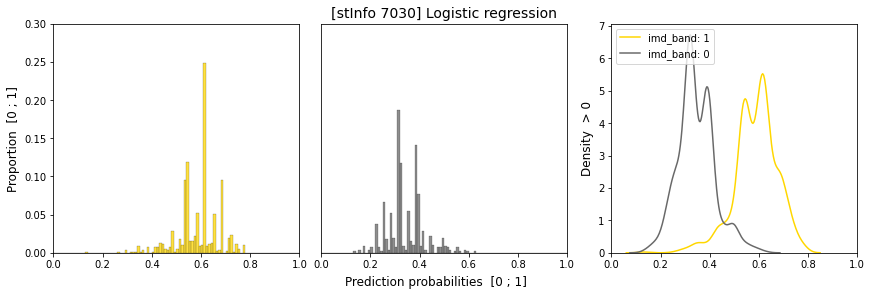

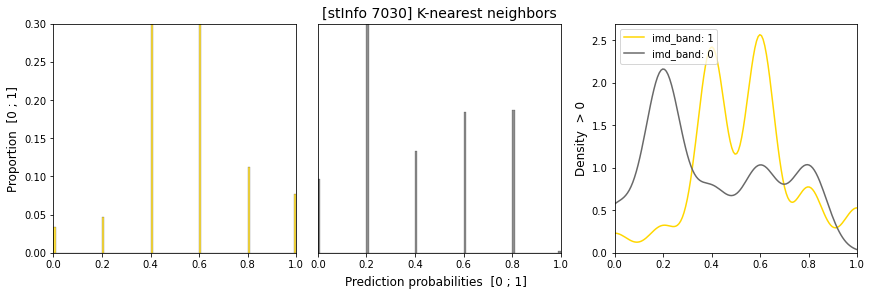

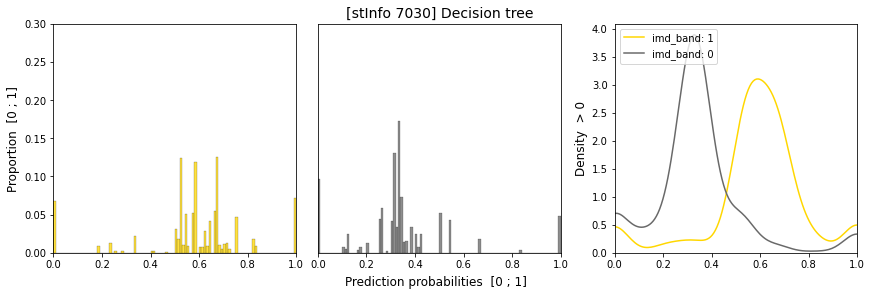

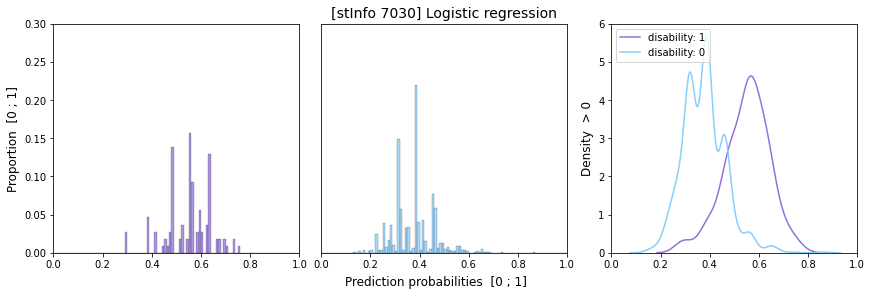

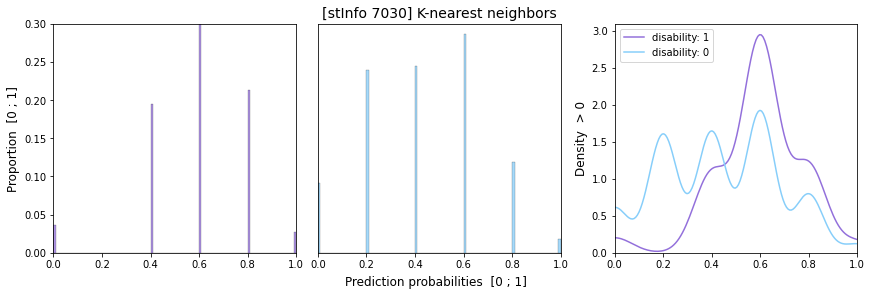

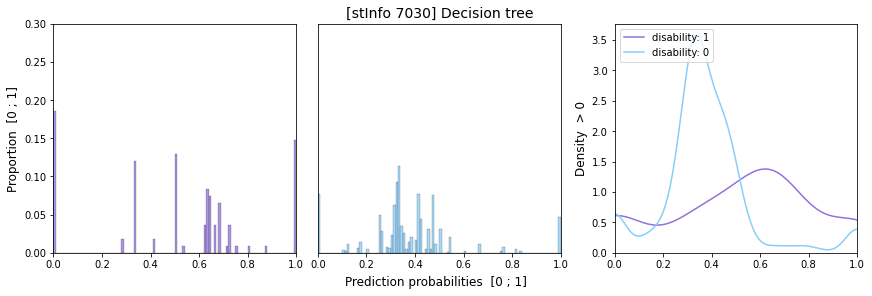

In [37]:
for sensfeat in SFEATURES:

    if sensfeat == "gender":
        color_gp_1 = "darkorange"
        color_gp_0 = "blue"
        #color_gp_1 = "mediumaquamarine"
        #color_gp_0 = "lightcoral"
    elif sensfeat == "imd_band":
        color_gp_1 = "gold"
        color_gp_0 = "dimgray"
    elif sensfeat == "disability":
        color_gp_1 = "mediumpurple"
        color_gp_0 = "lightskyblue"
    

    for mod_name in models:  # except svc model because no probability outputs 

        if mod_name == "clf_lr":
            model_name = "Logistic regression"
        elif mod_name == "clf_kn":
            model_name = "K-nearest neighbors"
        elif mod_name == "clf_dt":
            model_name = "Decision tree"
        elif mod_name == "clf_rf":
            model_name = "Random forest"
        else:
            print("Invalid model.")
            exit()
        
        fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
        fig.supxlabel("Prediction probabilities  [0 ; 1]", fontsize=12)
        # plot the 2 y_pred_{sensitive feature for group 0/1} separately
        ax0 = sns.histplot(ax=axes[0], data=models[mod_name].predict_proba(dict_subsets_test["X"+ "_test_" + sensfeat + "_"+ "1"])[:, 1], kde=False, stat="proportion", color=color_gp_1, bins=np.linspace(0,1,101))
        ax0.set_ylim(0, 0.3)
        ax0.set_xlim(0, 1)
        ax0.set_ylabel("Proportion  [0 ; 1]", fontsize=12)
        ax1 = sns.histplot(ax=axes[1], data=models[mod_name].predict_proba(dict_subsets_test["X"+ "_test_" + sensfeat + "_"+ "0"])[:, 0], kde=False, stat="proportion", color=color_gp_0, bins=np.linspace(0,1,101))
        ax1.set_ylim(0, 0.3)
        ax1.set_xlim(0, 1)
        ax1.set_yticklabels([]) # turn off y ticks labels
        ax1.yaxis.set_visible(False)
        # plot the 2 DDPs on the same graph
        ax2 = sns.kdeplot(ax=axes[2], data=models[mod_name].predict_proba(dict_subsets_test["X"+ "_test_" + sensfeat + "_"+ "1"])[:, 1], color=color_gp_1, label=sensfeat + ": 1")
        ax2 = sns.kdeplot(ax=axes[2], data=models[mod_name].predict_proba(dict_subsets_test["X"+ "_test_" + sensfeat + "_"+ "0"])[:, 0], color=color_gp_0, label=sensfeat + ": 0")
        ax2.set_ylabel("Density  > 0", fontsize=12)
        ax2.set_xlim(0, 1)
        
        plt.legend(loc="upper left")
        ax1.set_title(f"[{DATA} {SPLIT}] {model_name}", loc="center", fontsize=14)
    
        for ax in axes:
            obj = ax.get_children()
            pickle.dump(obj, open("../zones/kdes_" + mod_name + "_" + sensfeat + ".pickle", "wb"))

In [35]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [36]:
# save plt object for kde
        pickle.dump(axes[2].get_children(), open("../zones/kdes_" + mod_name + "_" + sensfeat + ".pickle", "wb"))

IndentationError: unexpected indent (3404495887.py, line 2)

In [ ]:
axes[2].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [ ]:
obj = axes[2].get_children()

In [ ]:
pickle.dump(obj, open("../zones/test.pickle", "wb"))